In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Directories
raw_dir = "../data/raw/"
processed_dir = "../data/processed/"
os.makedirs(processed_dir, exist_ok=True)

In [5]:
# List all simulation files
filenames = sorted([f for f in os.listdir(raw_dir) if f.endswith(".csv")])

print(f"Found {len(filenames)} simulation files.")

Found 25 simulation files.


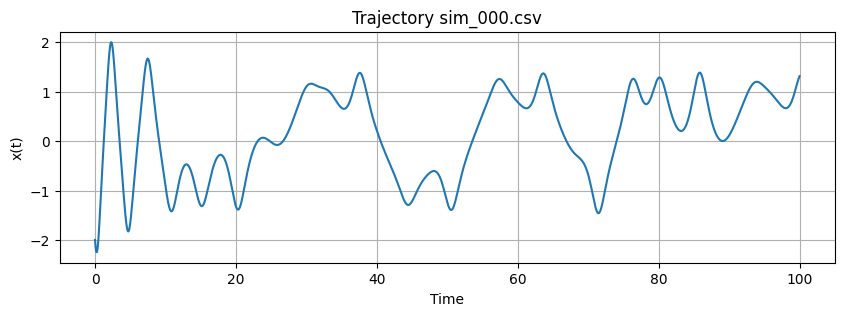

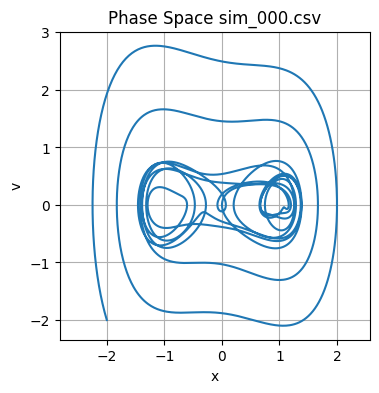

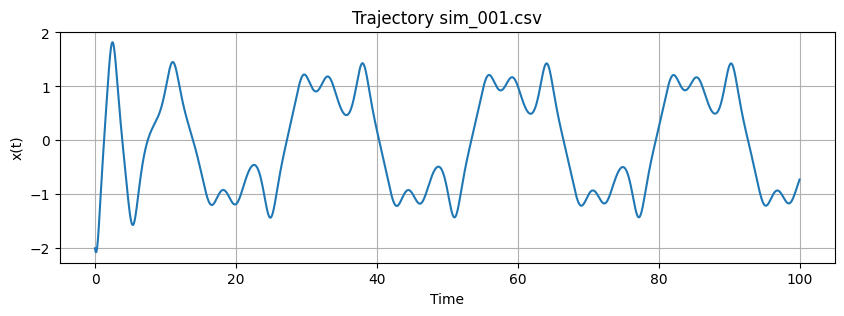

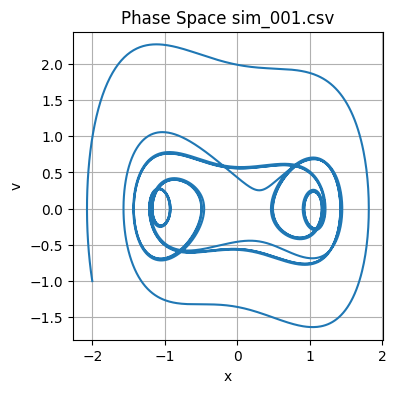

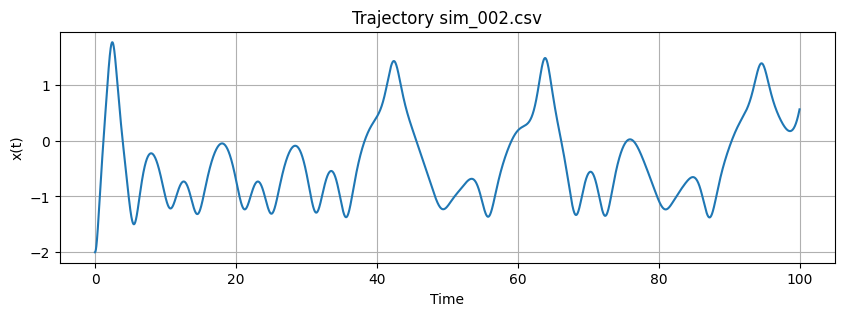

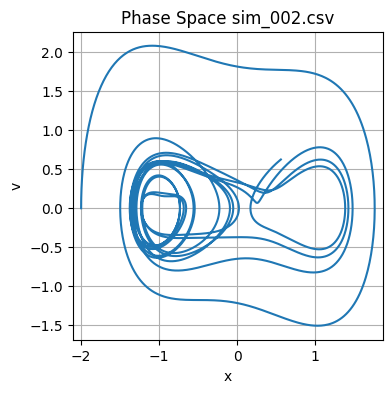

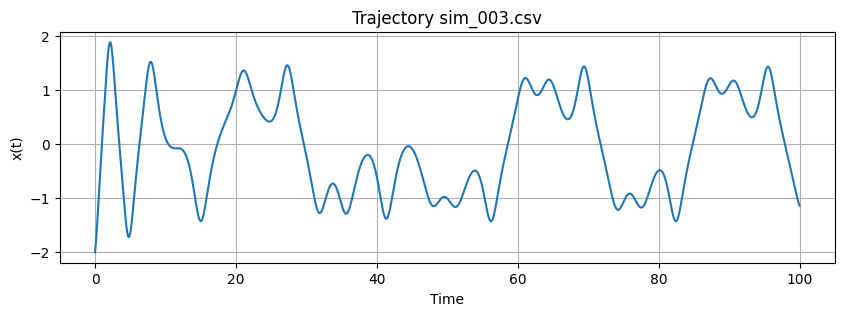

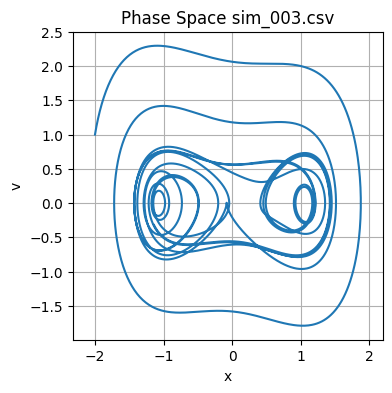

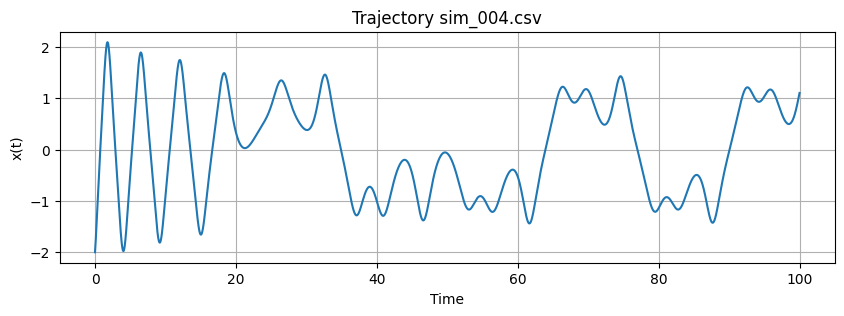

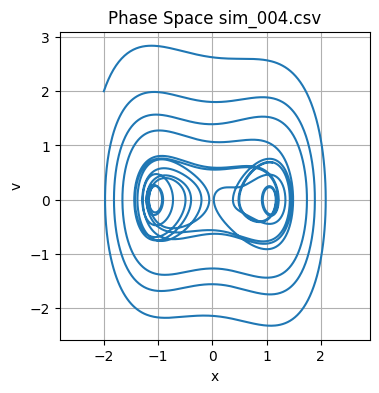

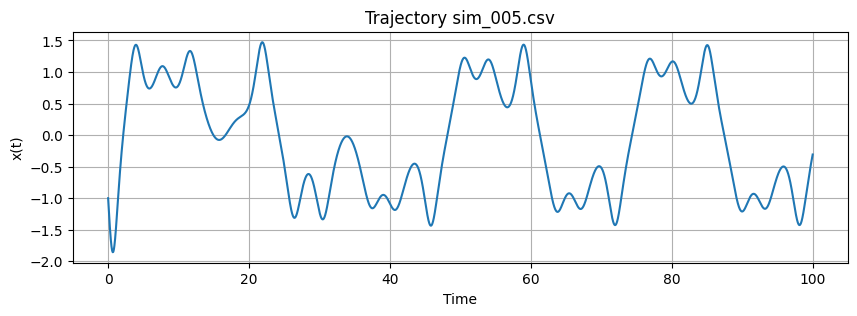

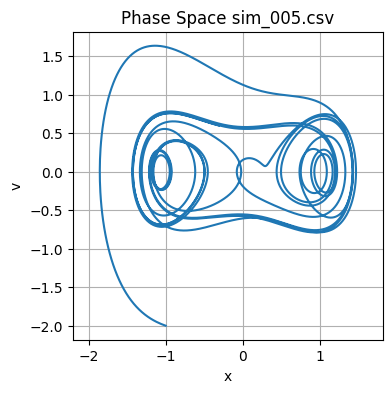

In [6]:
# Plot a few sample simulations
for i, file_name in enumerate(filenames[:6]):  # Show first 6
    data = pd.read_csv(os.path.join(raw_dir, file_name))

    t = data["t"].values
    x = data["x"].values
    v = data["v"].values

    # Plot x(t)
    plt.figure(figsize=(10, 3))
    plt.plot(t, x, label="x(t)")
    plt.title(f"Trajectory {file_name}")
    plt.xlabel("Time")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.show()

    # Phase space plot
    plt.figure(figsize=(4, 4))
    plt.plot(x, v)
    plt.title(f"Phase Space {file_name}")
    plt.xlabel("x")
    plt.ylabel("v")
    plt.grid(True)
    plt.axis("equal")
    plt.show()


In [7]:
# Convert all CSVs to .npy for fast loading in NN
for i, file_name in enumerate(filenames):
    data = pd.read_csv(os.path.join(raw_dir, file_name))
    arr = data[["x", "v"]].values  # You can include 't' if you want

    out_name = os.path.join(processed_dir, file_name.replace(".csv", ".npy"))
    np.save(out_name, arr)